In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X, y = iris.data, iris.target
X.shape

(150, 4)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
X_train.shape

(112, 4)

In [8]:
X_test.shape

(38, 4)

In [9]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('训练集准确率：%.2f'%knn_clf.score(X_train, y_train))
print('验证集准确率：%.2f'%knn_clf.score(X_test, y_test))


训练集准确率：0.97
验证集准确率：0.95


In [10]:
from sklearn.model_selection import GridSearchCV
n_neighbors = tuple(range(1, 11, 1))
cv = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid= {'n_neighbors':n_neighbors}, cv = 5)
cv.fit(X, y)
cv.best_params_

{'n_neighbors': 6}

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)
print('训练集准确率：%.2f'%knn_clf.score(X_train, y_train))
print('验证集准确率：%.2f'%knn_clf.score(X_test, y_test))


训练集准确率：0.96
验证集准确率：0.95


In [12]:
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()
boston.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [13]:
boston.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
boston.target[:10]


array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

In [15]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape



(15480, 8)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
print('训练集准确率：%.2f'%knn_reg.score(X_train, y_train))
print('验证集准确率：%.2f'%knn_reg.score(X_test, y_test))


训练集准确率：0.45
验证集准确率：0.15


In [17]:
n_neighbors = tuple(range(1, 12, 1))
cv_reg = GridSearchCV(estimator= KNeighborsRegressor(),
                      param_grid={'n_neighbors':n_neighbors}, cv = 5)
cv_reg.fit(X, y)
cv_reg.best_params_

{'n_neighbors': 10}

In [18]:
cv.best_score_

0.9800000000000001

In [19]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

In [20]:
def load_stock(start_date, end_date, output_file):
    try:
        df = pd.read_pickle(output_file)
        print('载入数据完毕')
    except FileNotFoundError:
        print('文件未找到')
        import yfinance as yf
        yf.pdr_override()
        df = web.get_data_yahoo(['601318.ss'], start=start_date, end=end_date)
        df.to_pickle(output_file)
        print('下载完成')
    return df

In [25]:
zgpa = load_stock(start_date='2017-03-09',
                  end_date='2020-03-05',
                  output_file = '601318.pkl')

文件未找到
[*********************100%%**********************]  1 of 1 completed
下载完成


In [27]:
zgpa.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-09,35.770000,35.799999,35.500000,35.779999,28.580835,37796652
2017-03-10,35.709999,35.770000,35.580002,35.599998,28.437052,20744676
2017-03-13,35.599998,36.040001,35.560001,35.970001,28.732611,35999002
2017-03-14,35.990002,36.130001,35.810001,35.939999,28.708643,27696420
2017-03-15,35.880001,36.000000,35.759998,35.959999,28.724619,26872050


In [44]:
def classification_tc(df):
    df['Open-Close'] = df['Open'] - df['Close']
    df['High-Low'] = df['High'] - df['Low']
    df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    y = df['target']
    return (df, X,y)

In [45]:
def regression_tc(df):
    df['Open-Close'] = df['Open'] - df['Close']
    df['High-Low'] = df['High'] - df['Low']
    df['target'] = df['Close'].shift(-1) - df['Close']
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    y = df['target']
    return (df, X,y)

In [46]:
df, X, y = classification_tc(zgpa)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [48]:
knn_clf = KNeighborsClassifier(n_neighbors=95)
knn_clf.fit(X_train, y_train)
print(knn_clf.score(X_train, y_train))
print(knn_clf.score(X_test, y_test))

0.5379310344827586
0.4931506849315068


In [49]:
df['Predict_Signal'] = knn_clf.predict(X)
df['Return'] = np.log(df['Close']/df['Close'].shift(1))
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,target,Predict_Signal,Return
Date,,,,,,,,,,,
2017-03-09,35.770000,35.799999,35.500000,35.779999,29.169281,37796652,-0.009998,0.299999,-1,1,NaN
2017-03-10,35.709999,35.770000,35.580002,35.599998,29.022537,20744676,0.110001,0.189999,1,1,-0.005043
2017-03-13,35.599998,36.040001,35.560001,35.970001,29.324186,35999002,-0.370003,0.480000,-1,1,0.010340
2017-03-14,35.990002,36.130001,35.810001,35.939999,29.299719,27696420,0.050003,0.320000,1,1,-0.000834
2017-03-15,35.880001,36.000000,35.759998,35.959999,29.316025,26872050,-0.079998,0.240002,1,1,0.000556


In [58]:
def get_cum_return(df, split_value):
    cum_returns = df[split_value:]['Return'].cumsum()*100
    return cum_returns

In [59]:
def get_strategy_return(df, split_value):
    df['Strategy_Return'] = df['Return']*df['Predict_Signal'].shift(1)
    cum_strategy_return = df[split_value:]['Strategy_Return'].cumsum()*100
    return cum_strategy_return

In [60]:
def plot_chart(cum_return, cum_strategy_return, symbol):
    plt.figure(figsize=(9,6))
    plt.plot(cum_return, '--', label='%s Returns'%symbol)
    plt.plot(cum_strategy_return, label='Strategy Returns')
    plt.legend()
    plt.show()

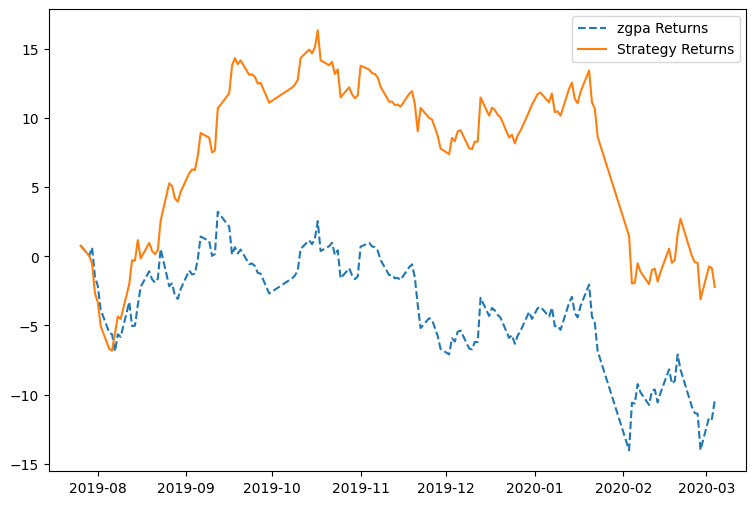

In [61]:
cum_return = get_cum_return(df, split_value=len(X_train))
cum_strategy_return = strategy_return(df, split_value=len(X_train))
plot_chart(cum_return, cum_strategy_return, 'zgpa')